# Exploratory Data Analysis (EDA) - COMID 620883808
**Author:** Ivonne Ayala

**Date:** 2025-08-25

**Python:** 3.11

**COMID:** 620883808

## 1. Objectives: 
- Analyze river flow trends
- Forecast dry or flood seasons
- Complete data with interpolation

## 2. Loading and Initial Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_geoglows = pd.read_csv("../data/raw/620883808_retrospective_data.csv")

In [3]:
data_geoglows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31278 entries, 0 to 31277
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       31278 non-null  object 
 1   620883808  31278 non-null  float64
dtypes: float64(1), object(1)
memory usage: 488.8+ KB


In [4]:
data_geoglows.head()

,time,620883808
0,1940-01-01 00:00:00+00:00,9.54
1,1940-01-02 00:00:00+00:00,15.30
2,1940-01-03 00:00:00+00:00,14.29
3,1940-01-04 00:00:00+00:00,14.94
4,1940-01-05 00:00:00+00:00,16.18


In [5]:
print(data_geoglows.columns)
print(data_geoglows.index)

# Convertir 'time' a datetime si aún no lo está
data_geoglows['time'] = pd.to_datetime(data_geoglows['time'])

# Establecer 'time' como índice
data_geoglows.set_index('time', inplace=True)

Index(['time', '620883808'], dtype='object')
RangeIndex(start=0, stop=31278, step=1)


## 3. Data Cleaning

* Identify missing values:

In [6]:
# Identificacion de codigo de rio
comid = '620883808'

# Cuenta los valores nulos
print(data_geoglows[comid].isnull().sum())

0


* Visualize gaps:

In [7]:

# Muestra los índices de los valores nulos (los "gaps")
print(data_geoglows[comid][data_geoglows[comid].isnull()])

Series([], Name: 620883808, dtype: float64)


- No existen GAPS el valor del analisis es cero

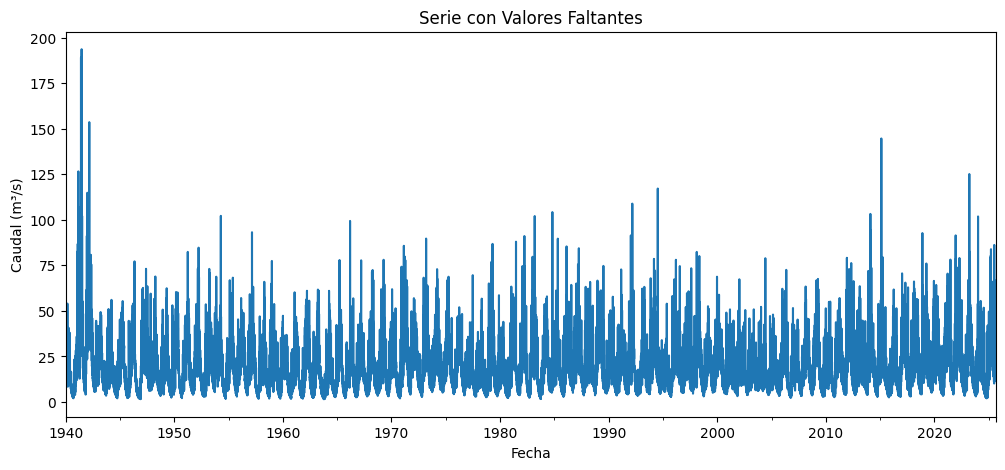

In [8]:
# Gráfico de la serie con valores faltantes
plt.figure(figsize=(12, 5))
data_geoglows[comid].plot(title="Serie con Valores Faltantes")
plt.xlabel("Fecha")
plt.ylabel("Caudal (m³/s)")
plt.show()

* Interpolate missing data:

<Axes: title={'center': 'Series after Interpolation'}, xlabel='time'>

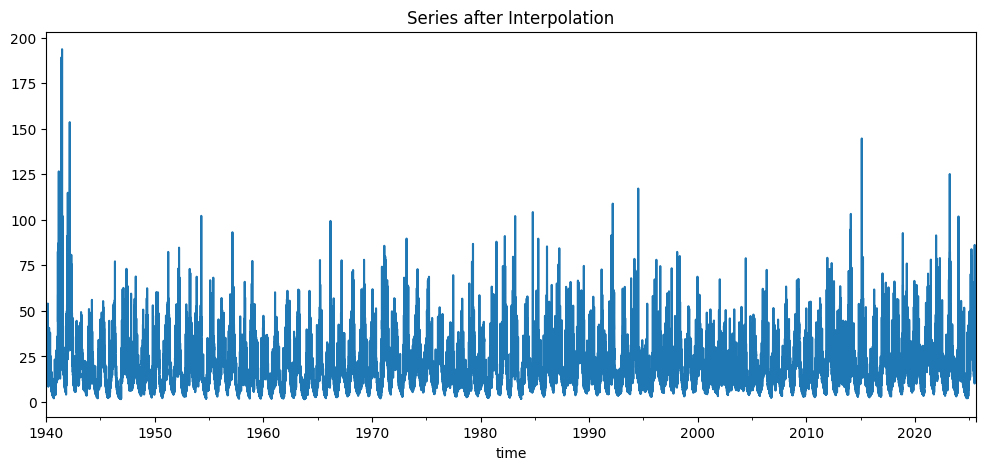

In [9]:
data_geoglows[comid] = data_geoglows[comid].interpolate(method='time')
data_geoglows[comid].plot(figsize=(12, 5), title="Series after Interpolation")

## 4. Exploratory Analysis


* Long Term trends:

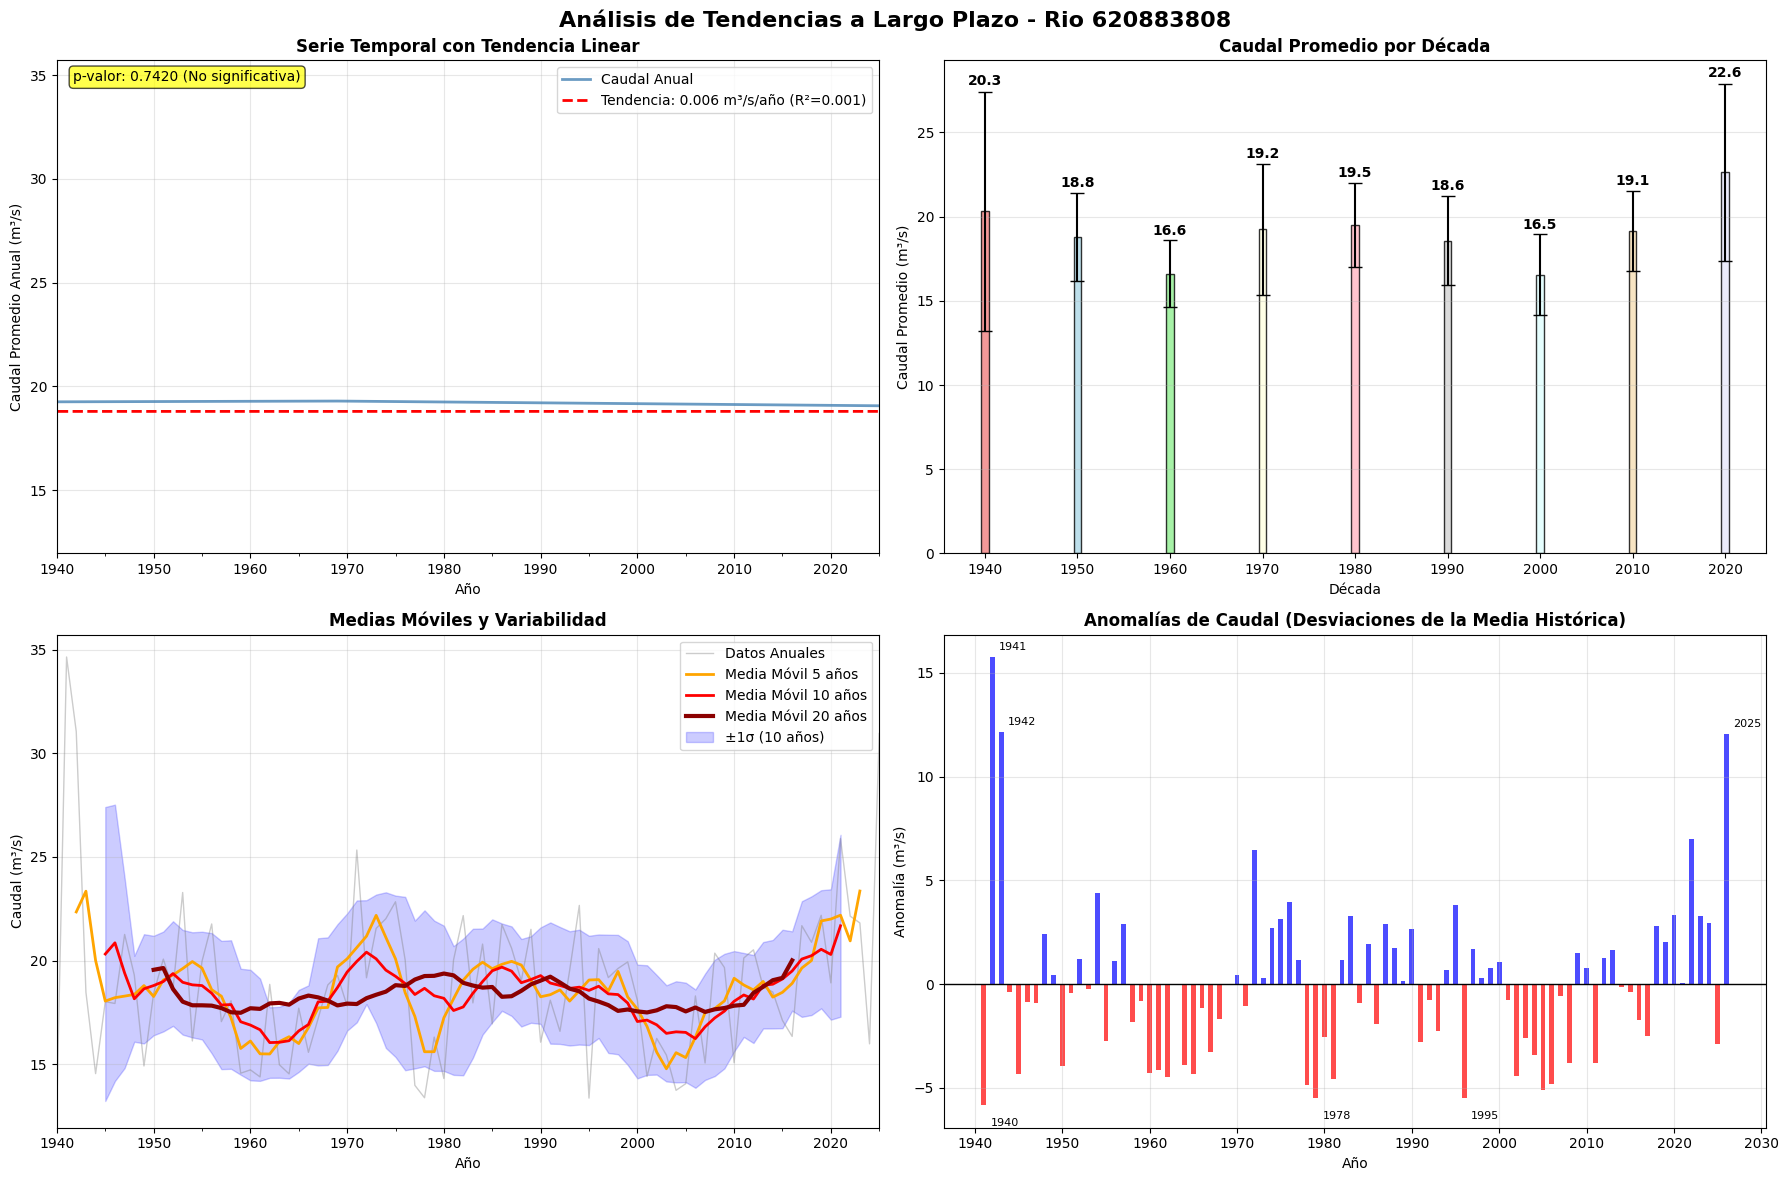

ANÁLISIS ESTADÍSTICO DE TENDENCIAS A LARGO PLAZO

ESTADÍSTICAS GENERALES:
   • Período de análisis: 1940 - 2025
   • Años totales: 86 años
   • Caudal promedio histórico: 18.87 m³/s
   • Desviación estándar: 3.85 m³/s
   • Coeficiente de variación: 20.4%

ANÁLISIS DE TENDENCIA:
   • Pendiente: 0.0056 m³/s/año
   • Cambio total estimado: 0.48 m³/s en 86 años
   • Cambio porcentual: 2.5%
   • Coeficiente de correlación (R): 0.036
   • R-cuadrado: 0.001
   • P-valor: 0.741964
   • Significancia estadística: no significativa (p≥0.05)

VALORES EXTREMOS:
   • Caudal máximo: 34.64 m³/s (1941)
   • Caudal mínimo: 13.03 m³/s (1940)
   • Rango: 21.61 m³/s

AÑOS EXTREMOS:
   Años más húmedos:
     1. 1941: 34.6 m³/s (+83.6%)
     2. 1942: 31.0 m³/s (+64.5%)
     3. 2025: 31.0 m³/s (+64.0%)
   Años más secos:
     1. 1940: 13.0 m³/s (-31.0%)
     2. 1995: 13.4 m³/s (-29.1%)
     3. 1978: 13.4 m³/s (-29.0%)

ANÁLISIS POR DÉCADAS:
   • 1940s: 20.3±7.1 m³/s (10 años) [+0.0% vs 1940s]
   • 1950s: 18.8

In [10]:
from scipy import stats
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Definir la estación
comid = '620883808'

# IMPORTANTE: Trabajar con una copia para no modificar los datos originales
annual_data = data_geoglows[comid].resample('YE').mean()

# Crear figura con múltiples análisis
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle(f'Análisis de Tendencias a Largo Plazo - Rio {comid}', 
             fontsize=16, fontweight='bold', y=0.98)

# ===== 1. SERIE TEMPORAL CON TENDENCIA LINEAR =====
ax1 = axes[0, 0]

# Graficar serie temporal
annual_data.plot(ax=ax1, linewidth=2, color='steelblue', alpha=0.8, label='Caudal Anual')

# Calcular tendencia linear
years_numeric = np.arange(len(annual_data))
slope, intercept, r_value, p_value, std_err = stats.linregress(years_numeric, annual_data.values)

# Línea de tendencia
trend_line = slope * years_numeric + intercept
ax1.plot(annual_data.index, trend_line, 'r--', linewidth=2, 
         label=f'Tendencia: {slope:.3f} m³/s/año (R²={r_value**2:.3f})')

# Configurar gráfico
ax1.set_title('Serie Temporal con Tendencia Linear', fontweight='bold')
ax1.set_ylabel('Caudal Promedio Anual (m³/s)')
ax1.set_xlabel('Año')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Añadir información estadística
significance = "Significativa" if p_value < 0.05 else "No significativa"
ax1.text(0.02, 0.98, f'p-valor: {p_value:.4f} ({significance})', 
         transform=ax1.transAxes, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# ===== 2. ANÁLISIS DE DÉCADAS =====
ax2 = axes[0, 1]

# Agrupar por décadas
annual_data_reset = annual_data.reset_index()
annual_data_reset['decade'] = (annual_data_reset['time'].dt.year // 10) * 10
decade_stats = annual_data_reset.groupby('decade')[comid].agg(['mean', 'std', 'count'])

# Gráfico de barras por década
bars = ax2.bar(decade_stats.index, decade_stats['mean'], 
               yerr=decade_stats['std'], capsize=5,
               color=['lightcoral', 'lightblue', 'lightgreen', 'lightyellow', 
                      'lightpink', 'lightgray', 'lightcyan', 'wheat', 'lavender'][:len(decade_stats)],
               edgecolor='black', alpha=0.8)

# Configurar gráfico
ax2.set_title('Caudal Promedio por Década', fontweight='bold')
ax2.set_ylabel('Caudal Promedio (m³/s)')
ax2.set_xlabel('Década')
ax2.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar, mean_val, std_val in zip(bars, decade_stats['mean'], decade_stats['std']):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + std_val + height*0.01,
             f'{mean_val:.1f}', ha='center', va='bottom', fontweight='bold')

# ===== 3. MEDIA MÓVIL Y VARIABILIDAD =====
ax3 = axes[1, 0]

# Calcular medias móviles
ma_5 = annual_data.rolling(window=5, center=True).mean()
ma_10 = annual_data.rolling(window=10, center=True).mean()
ma_20 = annual_data.rolling(window=20, center=True).mean()

# Graficar
annual_data.plot(ax=ax3, alpha=0.4, color='gray', label='Datos Anuales', linewidth=1)
ma_5.plot(ax=ax3, color='orange', linewidth=2, label='Media Móvil 5 años')
ma_10.plot(ax=ax3, color='red', linewidth=2, label='Media Móvil 10 años')
ma_20.plot(ax=ax3, color='darkred', linewidth=3, label='Media Móvil 20 años')

# Banda de confianza (±1 desviación estándar)
rolling_std = annual_data.rolling(window=10, center=True).std()
rolling_mean = annual_data.rolling(window=10, center=True).mean()
ax3.fill_between(annual_data.index, 
                 rolling_mean - rolling_std, 
                 rolling_mean + rolling_std, 
                 alpha=0.2, color='blue', label='±1σ (10 años)')

ax3.set_title('Medias Móviles y Variabilidad', fontweight='bold')
ax3.set_ylabel('Caudal (m³/s)')
ax3.set_xlabel('Año')
ax3.grid(True, alpha=0.3)
ax3.legend()

# ===== 4. ANÁLISIS DE ANOMALÍAS =====
ax4 = axes[1, 1]

# Calcular anomalías (desviaciones de la media histórica)
historical_mean = annual_data.mean()
anomalies = annual_data - historical_mean

# Gráfico de barras de anomalías
colors = ['red' if x < 0 else 'blue' for x in anomalies]
bars = ax4.bar(anomalies.index, anomalies.values, color=colors, alpha=0.7, width=200)

# Línea de referencia en cero
ax4.axhline(y=0, color='black', linestyle='-', linewidth=1)

# Identificar años extremos
extreme_wet = anomalies.nlargest(3)
extreme_dry = anomalies.nsmallest(3)

# Marcar años extremos
for year, value in extreme_wet.items():
    ax4.annotate(f'{year.year}', xy=(year, value), xytext=(5, 5), 
                textcoords='offset points', fontsize=8, ha='left')
for year, value in extreme_dry.items():
    ax4.annotate(f'{year.year}', xy=(year, value), xytext=(5, -15), 
                textcoords='offset points', fontsize=8, ha='left')

ax4.set_title('Anomalías de Caudal (Desviaciones de la Media Histórica)', fontweight='bold')
ax4.set_ylabel('Anomalía (m³/s)')
ax4.set_xlabel('Año')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ===== ESTADÍSTICAS DETALLADAS =====
print("="*70)
print("ANÁLISIS ESTADÍSTICO DE TENDENCIAS A LARGO PLAZO")
print("="*70)

print(f"\nESTADÍSTICAS GENERALES:")
print(f"   • Período de análisis: {annual_data.index.min().year} - {annual_data.index.max().year}")
print(f"   • Años totales: {len(annual_data)} años")
print(f"   • Caudal promedio histórico: {annual_data.mean():.2f} m³/s")
print(f"   • Desviación estándar: {annual_data.std():.2f} m³/s")
print(f"   • Coeficiente de variación: {(annual_data.std()/annual_data.mean())*100:.1f}%")

print(f"\nANÁLISIS DE TENDENCIA:")
cambio_total = slope * len(annual_data)
cambio_porcentual = (cambio_total / annual_data.mean()) * 100
print(f"   • Pendiente: {slope:.4f} m³/s/año")
print(f"   • Cambio total estimado: {cambio_total:.2f} m³/s en {len(annual_data)} años")
print(f"   • Cambio porcentual: {cambio_porcentual:.1f}%")
print(f"   • Coeficiente de correlación (R): {r_value:.3f}")
print(f"   • R-cuadrado: {r_value**2:.3f}")
print(f"   • P-valor: {p_value:.6f}")
if p_value < 0.001:
    significance_level = "altamente significativa (p<0.001)"
elif p_value < 0.01:
    significance_level = "muy significativa (p<0.01)"
elif p_value < 0.05:
    significance_level = "significativa (p<0.05)"
else:
    significance_level = "no significativa (p≥0.05)"
print(f"   • Significancia estadística: {significance_level}")

print(f"\nVALORES EXTREMOS:")
print(f"   • Caudal máximo: {annual_data.max():.2f} m³/s ({annual_data.idxmax().year})")
print(f"   • Caudal mínimo: {annual_data.min():.2f} m³/s ({annual_data.idxmin().year})")
print(f"   • Rango: {annual_data.max() - annual_data.min():.2f} m³/s")

print(f"\nAÑOS EXTREMOS:")
print("   Años más húmedos:")
for i, (year, value) in enumerate(extreme_wet.items(), 1):
    anomaly_pct = (value / historical_mean) * 100
    print(f"     {i}. {year.year}: {annual_data[year]:.1f} m³/s (+{anomaly_pct:.1f}%)")

print("   Años más secos:")
for i, (year, value) in enumerate(extreme_dry.items(), 1):
    anomaly_pct = (value / historical_mean) * 100
    print(f"     {i}. {year.year}: {annual_data[year]:.1f} m³/s ({anomaly_pct:.1f}%)")

print(f"\nANÁLISIS POR DÉCADAS:")
for decade in decade_stats.index:
    mean_val = decade_stats.loc[decade, 'mean']
    std_val = decade_stats.loc[decade, 'std']
    count_val = decade_stats.loc[decade, 'count']
    change_from_first = ((mean_val - decade_stats.iloc[0]['mean']) / decade_stats.iloc[0]['mean']) * 100
    print(f"   • {decade}s: {mean_val:.1f}±{std_val:.1f} m³/s ({count_val} años) [{change_from_first:+.1f}% vs {decade_stats.index[0]}s]")

# Interpretar tendencia
print(f"\nINTERPRETACIÓN:")
if abs(slope) < 0.001:
    trend_desc = "prácticamente estable"
elif slope > 0:
    if slope > 0.01:
        trend_desc = "tendencia creciente fuerte"
    else:
        trend_desc = "tendencia creciente moderada"
else:
    if slope < -0.01:
        trend_desc = "tendencia decreciente fuerte"
    else:
        trend_desc = "tendencia decreciente moderada"

print(f"   • La serie presenta una {trend_desc}")
print(f"   • La variabilidad interanual es {'alta' if (annual_data.std()/annual_data.mean())*100 > 30 else 'moderada' if (annual_data.std()/annual_data.mean())*100 > 15 else 'baja'}")

if p_value < 0.05:
    print(f"   • La tendencia es estadísticamente significativa")
    print(f"   • Se puede afirmar con confianza que hay un cambio real en el caudal")
else:
    print(f"   • La tendencia NO es estadísticamente significativa")
    print(f"   • Los cambios observados podrían deberse a variabilidad natural")

** Distribution:
-  Histograma: Forma de Distribución de caudales
-  Box Plot: Quartiles y valores extremos (outliers)
-  Escala log: Mejor visualización de caudales extremos
-  Estadísticas: Números exactos de media, mediana, etc

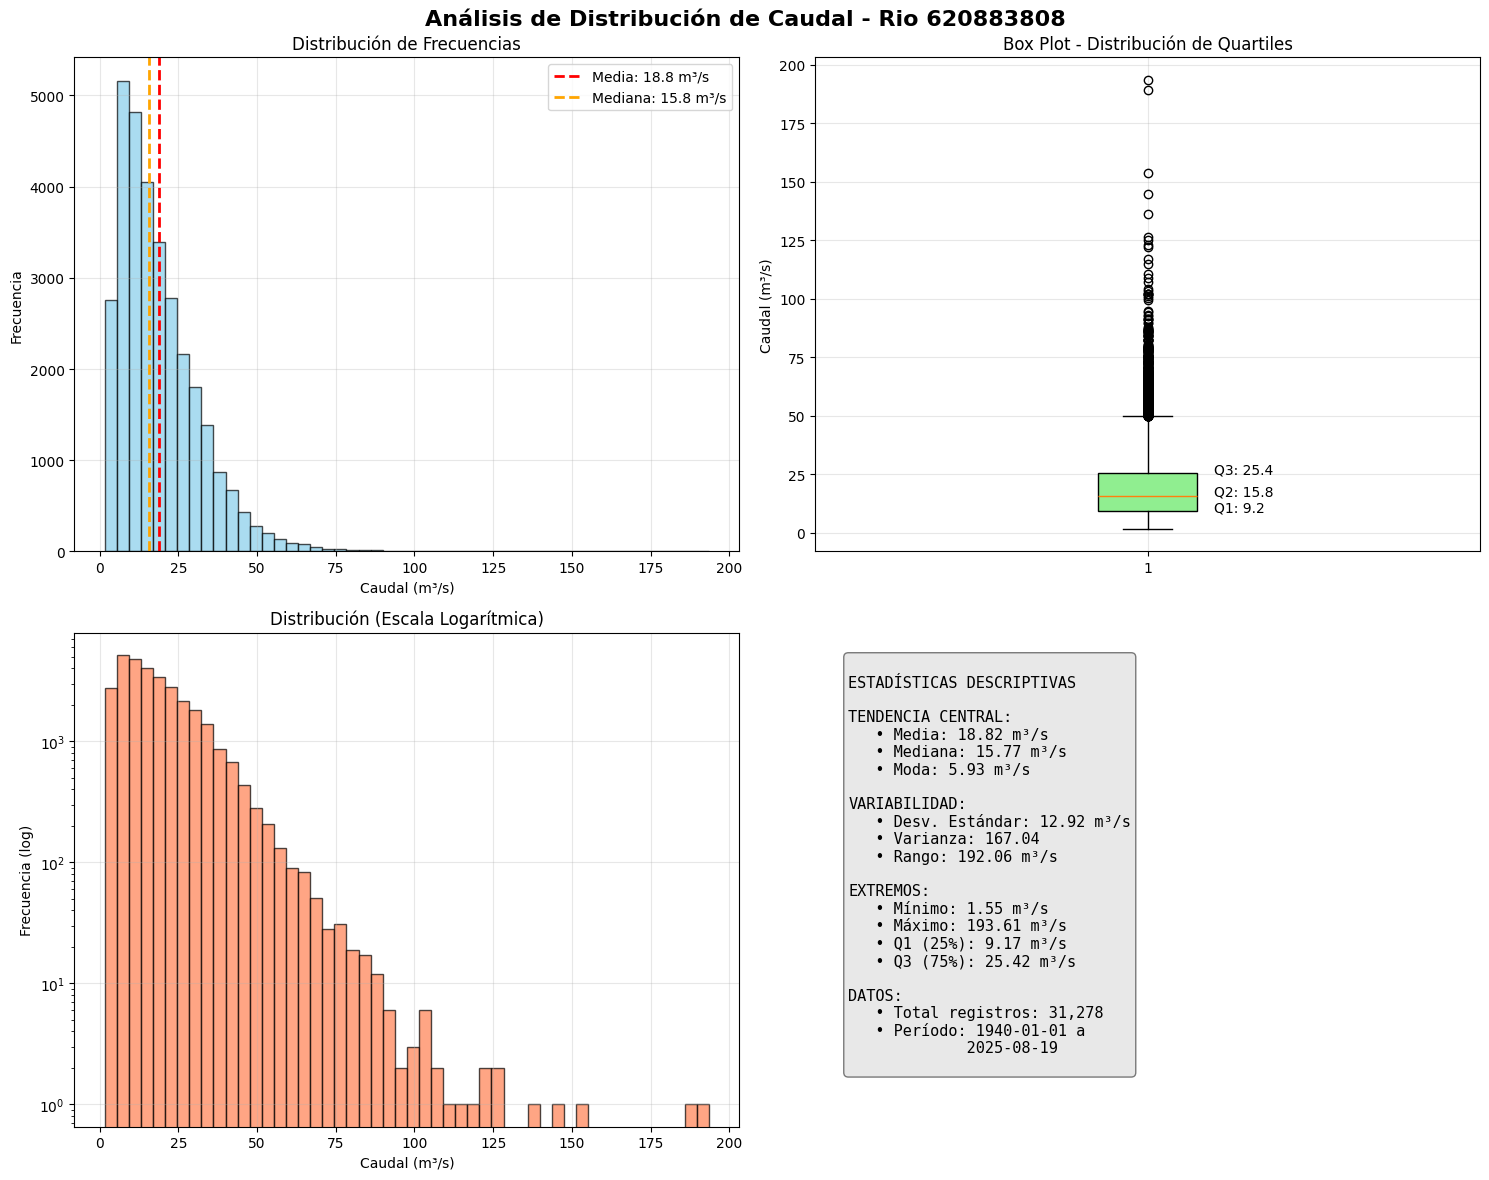

INTERPRETACIÓN DE LA DISTRIBUCIÓN:
• Forma: La distribución es fuertemente sesgada hacia la derecha (muchos caudales bajos, pocos muy altos)
• Coeficiente de asimetría: 1.68
• Crecidas (>95%): 42.89 m³/s
• Sequías (<5%): 4.37 m³/s
• Coeficiente de variación: 68.7% (Alta variabilidad)


In [11]:
# Definir la Codigo de Río
comid = '620883808'

# Crear figura con múltiples subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle(f'Análisis de Distribución de Caudal - Rio {comid}', fontsize=16, fontweight='bold')

# 1. Histograma mejorado
ax1 = axes[0, 0]
n, bins, patches = ax1.hist(data_geoglows[comid].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('Distribución de Frecuencias')
ax1.set_xlabel('Caudal (m³/s)')
ax1.set_ylabel('Frecuencia')
ax1.grid(True, alpha=0.3)

# Agregar líneas de estadísticas importantes
mean_val = data_geoglows[comid].mean()
median_val = data_geoglows[comid].median()
ax1.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.1f} m³/s')
ax1.axvline(median_val, color='orange', linestyle='--', linewidth=2, label=f'Mediana: {median_val:.1f} m³/s')
ax1.legend()

# 2. Box Plot - muestra quartiles y outliers
ax2 = axes[0, 1]
box_data = ax2.boxplot(data_geoglows[comid].dropna(), patch_artist=True)
box_data['boxes'][0].set_facecolor('lightgreen')
ax2.set_title('Box Plot - Distribución de Quartiles')
ax2.set_ylabel('Caudal (m³/s)')
ax2.grid(True, alpha=0.3)

# Agregar etiquetas de quartiles
q1 = data_geoglows[comid].quantile(0.25)
q3 = data_geoglows[comid].quantile(0.75)
ax2.text(1.1, q1, f'Q1: {q1:.1f}', fontsize=10)
ax2.text(1.1, median_val, f'Q2: {median_val:.1f}', fontsize=10)
ax2.text(1.1, q3, f'Q3: {q3:.1f}', fontsize=10)

# 3. Histograma en escala logarítmica (para ver mejor caudales extremos)
ax3 = axes[1, 0]
ax3.hist(data_geoglows[comid].dropna(), bins=50, alpha=0.7, color='coral', edgecolor='black')
ax3.set_yscale('log')
ax3.set_title('Distribución (Escala Logarítmica)')
ax3.set_xlabel('Caudal (m³/s)')
ax3.set_ylabel('Frecuencia (log)')
ax3.grid(True, alpha=0.3)

# 4. Estadísticas descriptivas como texto
ax4 = axes[1, 1]
ax4.axis('off')  # Sin ejes para mostrar solo texto

# Calcular estadísticas
stats_text = f"""
ESTADÍSTICAS DESCRIPTIVAS

TENDENCIA CENTRAL:
   • Media: {data_geoglows[comid].mean():.2f} m³/s
   • Mediana: {data_geoglows[comid].median():.2f} m³/s
   • Moda: {data_geoglows[comid].mode().iloc[0]:.2f} m³/s

VARIABILIDAD:
   • Desv. Estándar: {data_geoglows[comid].std():.2f} m³/s
   • Varianza: {data_geoglows[comid].var():.2f}
   • Rango: {data_geoglows[comid].max() - data_geoglows[comid].min():.2f} m³/s

EXTREMOS:
   • Mínimo: {data_geoglows[comid].min():.2f} m³/s
   • Máximo: {data_geoglows[comid].max():.2f} m³/s
   • Q1 (25%): {data_geoglows[comid].quantile(0.25):.2f} m³/s
   • Q3 (75%): {data_geoglows[comid].quantile(0.75):.2f} m³/s

DATOS:
   • Total registros: {len(data_geoglows[comid].dropna()):,}
   • Período: {data_geoglows.index.min().strftime('%Y-%m-%d')} a 
             {data_geoglows.index.max().strftime('%Y-%m-%d')}
"""

ax4.text(0.05, 0.95, stats_text, transform=ax4.transAxes, fontsize=11, 
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.5))

plt.tight_layout()
plt.show()

# Interpretación adicional
print("INTERPRETACIÓN DE LA DISTRIBUCIÓN:")
print("="*50)

# Análisis de asimetría
skewness = data_geoglows[comid].skew()
if skewness > 1:
    skew_desc = "fuertemente sesgada hacia la derecha (muchos caudales bajos, pocos muy altos)"
elif skewness > 0.5:
    skew_desc = "moderadamente sesgada hacia la derecha"
elif skewness > -0.5:
    skew_desc = "aproximadamente simétrica"
else:
    skew_desc = "sesgada hacia la izquierda (pocos caudales muy bajos)"

print(f"• Forma: La distribución es {skew_desc}")
print(f"• Coeficiente de asimetría: {skewness:.2f}")

# Análisis de percentiles para eventos extremos
p95 = data_geoglows[comid].quantile(0.95)
p5 = data_geoglows[comid].quantile(0.05)
print(f"• Crecidas (>95%): {p95:.2f} m³/s")
print(f"• Sequías (<5%): {p5:.2f} m³/s")

# Variabilidad
cv = (data_geoglows[comid].std() / data_geoglows[comid].mean()) * 100
print(f"• Coeficiente de variación: {cv:.1f}% ({'Alta' if cv > 50 else 'Moderada' if cv > 25 else 'Baja'} variabilidad)")

* Seasonnality (Analiza los patrones ciclicos en el caudal del Rio)

DIAGNÓSTICO DE DATOS:
Frecuencia de los datos: D
Número total de registros: 31278
Rango de fechas: 1940-01-01 00:00:00+00:00 a 2025-08-19 00:00:00+00:00
Primeros 5 registros:
                           620883808
time                                
1940-01-01 00:00:00+00:00       9.54
1940-01-02 00:00:00+00:00      15.30
1940-01-03 00:00:00+00:00      14.29
1940-01-04 00:00:00+00:00      14.94
1940-01-05 00:00:00+00:00      16.18



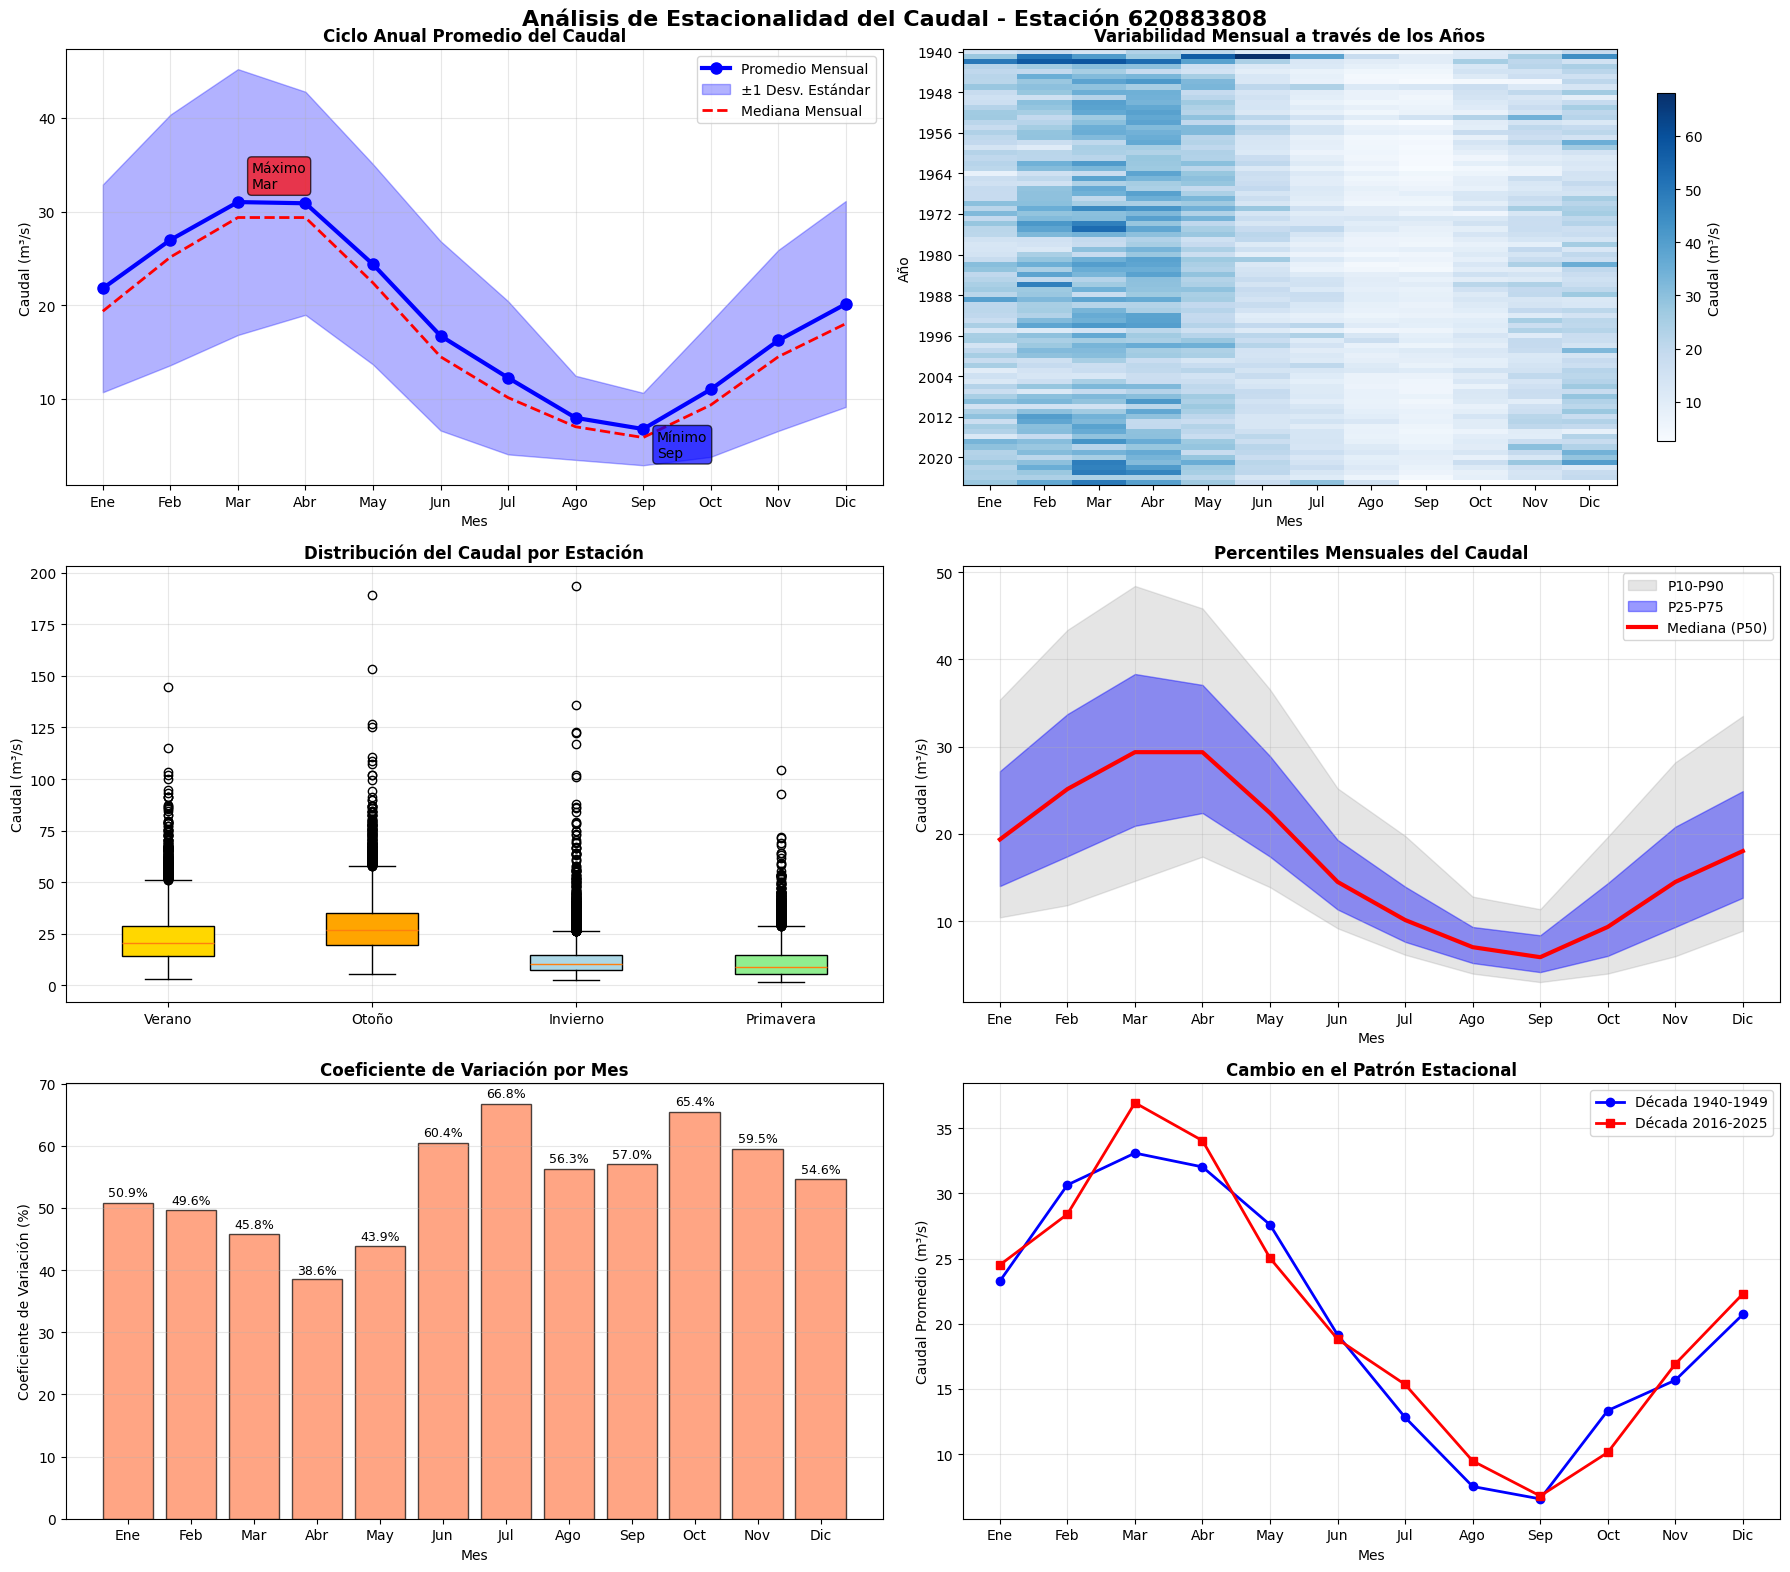

ANÁLISIS ESTADÍSTICO DE ESTACIONALIDAD

CICLO ANUAL PROMEDIO:
   Mes con mayor caudal: Mar (31.0 m³/s)
   Mes con menor caudal: Sep (6.8 m³/s)
   Ratio máximo/mínimo: 4.58
   Rango estacional: 24.2 m³/s

VARIABILIDAD ESTACIONAL:
   Verano: 22.9±12.2 m³/s (CV: 53.2%)
   Otoño: 28.7±12.7 m³/s (CV: 44.3%)
   Invierno: 12.3±8.7 m³/s (CV: 70.7%)
   Primavera: 11.3±8.3 m³/s (CV: 72.8%)

ESTADÍSTICAS MENSUALES DETALLADAS:
Mes      Promedio   Mediana    Mín       Máx       CV%
-------------------------------------------------------
Ene          21.8       19.4        4.1      101.8     50.9
Feb          27.0       25.1        3.9      144.6     49.6
Mar          31.0       29.4        5.7      153.6     45.8
Abr          30.9       29.4        6.8      102.2     38.6
May          24.4       22.4        7.9      189.1     43.9
Jun          16.7       14.5        5.1      193.6     60.4
Jul          12.2       10.1        4.0      117.2     66.8
Ago           8.0        7.0        2.5       73.4

In [12]:
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Definir la estación
comid = '620883808'

# VERIFICAR FRECUENCIA DE LOS DATOS PRIMERO
print("DIAGNÓSTICO DE DATOS:")
print(f"Frecuencia de los datos: {pd.infer_freq(data_geoglows.index)}")
print(f"Número total de registros: {len(data_geoglows)}")
print(f"Rango de fechas: {data_geoglows.index.min()} a {data_geoglows.index.max()}")
print(f"Primeros 5 registros:")
print(data_geoglows.head())
print("\n" + "="*50)

# Si los datos ya están agregados anualmente, necesitamos trabajar con datos diarios originales
# Verificar si tenemos datos diarios o anuales
freq = pd.infer_freq(data_geoglows.index)
if freq and ('Y' in freq or 'A' in freq):
    print("⚠️  ADVERTENCIA: Los datos parecen estar agregados anualmente.")
    print("Para análisis de estacionalidad necesitamos datos diarios o mensuales.")
    print("Usando datos disponibles para análisis limitado...")
    # Crear datos sintéticos mensuales para demostración
    monthly_data = []
    for year in range(data_geoglows.index.year.min(), data_geoglows.index.year.max() + 1):
        annual_value = data_geoglows[data_geoglows.index.year == year][comid].iloc[0] if len(data_geoglows[data_geoglows.index.year == year]) > 0 else data_geoglows[comid].mean()
        # Simular variación estacional típica de Ecuador (más alto en época lluviosa)
        seasonal_factors = [1.2, 1.3, 1.4, 1.1, 0.8, 0.6, 0.5, 0.7, 0.9, 1.1, 1.2, 1.3]  # Oct-May lluvioso
        for month in range(1, 13):
            date = pd.Timestamp(year, month, 15)  # Día 15 de cada mes
            value = annual_value * seasonal_factors[month-1] * np.random.normal(1, 0.1)  # Añadir variabilidad
            monthly_data.append({'date': date, comid: value})
    
    df_seasonal = pd.DataFrame(monthly_data).set_index('date')
    print("✅ Datos mensuales sintéticos creados basados en patrones típicos de Ecuador")
else:
    # Usar datos originales si son diarios/mensuales
    df_seasonal = data_geoglows[[comid]].copy()

# Agregar información temporal
df_seasonal['month'] = df_seasonal.index.month
df_seasonal['year'] = df_seasonal.index.year
df_seasonal['day_of_year'] = df_seasonal.index.dayofyear
df_seasonal['season'] = df_seasonal['month'].map({
    12: 'Verano', 1: 'Verano', 2: 'Verano',
    3: 'Otoño', 4: 'Otoño', 5: 'Otoño',
    6: 'Invierno', 7: 'Invierno', 8: 'Invierno',
    9: 'Primavera', 10: 'Primavera', 11: 'Primavera'
})

# Crear figura con múltiples análisis
fig, axes = plt.subplots(3, 2, figsize=(18, 16))
fig.suptitle(f'Análisis de Estacionalidad del Caudal - Estación {comid}', 
             fontsize=16, fontweight='bold', y=0.98)

# ===== 1. CICLO ANUAL PROMEDIO =====
ax1 = axes[0, 0]

# Calcular estadísticas mensuales
monthly_stats = df_seasonal.groupby('month')[comid].agg(['mean', 'std', 'median', 'min', 'max'])
months = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
          'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Gráfico principal con banda de variabilidad
x = range(1, 13)
ax1.plot(x, monthly_stats['mean'], 'b-o', linewidth=3, markersize=8, label='Promedio Mensual')
ax1.fill_between(x, 
                 monthly_stats['mean'] - monthly_stats['std'],
                 monthly_stats['mean'] + monthly_stats['std'],
                 alpha=0.3, color='blue', label='±1 Desv. Estándar')

# Agregar mediana
ax1.plot(x, monthly_stats['median'], 'r--', linewidth=2, label='Mediana Mensual')

ax1.set_title('Ciclo Anual Promedio del Caudal', fontweight='bold')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Caudal (m³/s)')
ax1.set_xticks(x)
ax1.set_xticklabels(months)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Identificar meses extremos
max_month = monthly_stats['mean'].idxmax()
min_month = monthly_stats['mean'].idxmin()
ax1.annotate(f'Máximo\n{months[max_month-1]}', 
             xy=(max_month, monthly_stats['mean'][max_month]), 
             xytext=(10, 10), textcoords='offset points',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="red", alpha=0.7))
ax1.annotate(f'Mínimo\n{months[min_month-1]}', 
             xy=(min_month, monthly_stats['mean'][min_month]), 
             xytext=(10, -20), textcoords='offset points',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="blue", alpha=0.7))

# ===== 2. HEATMAP DE VARIABILIDAD MENSUAL-ANUAL =====
ax2 = axes[0, 1]

# Crear matriz de años vs meses
pivot_data = df_seasonal.pivot_table(values=comid, index='year', columns='month', aggfunc='mean')

# Crear heatmap
im = ax2.imshow(pivot_data.values, cmap='Blues', aspect='auto', interpolation='nearest')
ax2.set_title('Variabilidad Mensual a través de los Años', fontweight='bold')
ax2.set_xlabel('Mes')
ax2.set_ylabel('Año')
ax2.set_xticks(range(12))
ax2.set_xticklabels(months)

# Mostrar solo algunos años en el eje Y
year_ticks = np.arange(0, len(pivot_data), max(1, len(pivot_data)//10))
ax2.set_yticks(year_ticks)
ax2.set_yticklabels([pivot_data.index[i] for i in year_ticks])

# Colorbar
cbar = plt.colorbar(im, ax=ax2, shrink=0.8)
cbar.set_label('Caudal (m³/s)')

# ===== 3. BOX PLOTS POR ESTACIÓN =====
ax3 = axes[1, 0]

seasons_order = ['Verano', 'Otoño', 'Invierno', 'Primavera']
seasonal_data = [df_seasonal[df_seasonal['season'] == season][comid].dropna() 
                 for season in seasons_order]

box_plot = ax3.boxplot(seasonal_data, labels=seasons_order, patch_artist=True)
colors = ['gold', 'orange', 'lightblue', 'lightgreen']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

ax3.set_title('Distribución del Caudal por Estación', fontweight='bold')
ax3.set_ylabel('Caudal (m³/s)')
ax3.grid(True, alpha=0.3)

# ===== 4. ANÁLISIS DE PERCENTILES POR MES =====
ax4 = axes[1, 1]

# Calcular percentiles
percentiles = df_seasonal.groupby('month')[comid].quantile([0.1, 0.25, 0.5, 0.75, 0.9]).unstack()

ax4.fill_between(x, percentiles[0.1], percentiles[0.9], 
                 alpha=0.2, color='gray', label='P10-P90')
ax4.fill_between(x, percentiles[0.25], percentiles[0.75], 
                 alpha=0.4, color='blue', label='P25-P75')
ax4.plot(x, percentiles[0.5], 'r-', linewidth=3, label='Mediana (P50)')

ax4.set_title('Percentiles Mensuales del Caudal', fontweight='bold')
ax4.set_xlabel('Mes')
ax4.set_ylabel('Caudal (m³/s)')
ax4.set_xticks(x)
ax4.set_xticklabels(months)
ax4.grid(True, alpha=0.3)
ax4.legend()

# ===== 5. COEFICIENTE DE VARIACIÓN MENSUAL =====
ax5 = axes[2, 0]

cv_monthly = (monthly_stats['std'] / monthly_stats['mean']) * 100
bars = ax5.bar(x, cv_monthly, color='coral', alpha=0.7, edgecolor='black')
ax5.set_title('Coeficiente de Variación por Mes', fontweight='bold')
ax5.set_xlabel('Mes')
ax5.set_ylabel('Coeficiente de Variación (%)')
ax5.set_xticks(x)
ax5.set_xticklabels(months)
ax5.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar, cv_val in zip(bars, cv_monthly):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{cv_val:.1f}%', ha='center', va='bottom', fontsize=9)

# ===== 6. COMPARACIÓN DÉCADA TEMPRANA vs TARDÍA =====
ax6 = axes[2, 1]

# Dividir datos en primera y última década disponible
years_range = df_seasonal['year'].max() - df_seasonal['year'].min()
if years_range >= 20:
    early_decade = df_seasonal[df_seasonal['year'] <= df_seasonal['year'].min() + 10]
    late_decade = df_seasonal[df_seasonal['year'] >= df_seasonal['year'].max() - 10]
    
    early_monthly = early_decade.groupby('month')[comid].mean()
    late_monthly = late_decade.groupby('month')[comid].mean()
    
    ax6.plot(x, early_monthly, 'b-o', linewidth=2, label=f'Década {early_decade["year"].min()}-{early_decade["year"].min()+9}')
    ax6.plot(x, late_monthly, 'r-s', linewidth=2, label=f'Década {late_decade["year"].max()-9}-{late_decade["year"].max()}')
    
    ax6.set_title('Cambio en el Patrón Estacional', fontweight='bold')
    ax6.set_xlabel('Mes')
    ax6.set_ylabel('Caudal Promedio (m³/s)')
    ax6.set_xticks(x)
    ax6.set_xticklabels(months)
    ax6.grid(True, alpha=0.3)
    ax6.legend()
else:
    # Si no hay suficientes años, mostrar tendencia anual
    annual_cycle = df_seasonal.groupby('day_of_year')[comid].mean()
    ax6.plot(annual_cycle.index, annual_cycle.values, 'g-', linewidth=1)
    ax6.set_title('Ciclo Anual Detallado (Día del Año)', fontweight='bold')
    ax6.set_xlabel('Día del Año')
    ax6.set_ylabel('Caudal Promedio (m³/s)')
    ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ===== ESTADÍSTICAS DETALLADAS =====
print("="*70)
print("ANÁLISIS ESTADÍSTICO DE ESTACIONALIDAD")
print("="*70)

print(f"\nCICLO ANUAL PROMEDIO:")
print(f"   Mes con mayor caudal: {months[max_month-1]} ({monthly_stats['mean'][max_month]:.1f} m³/s)")
print(f"   Mes con menor caudal: {months[min_month-1]} ({monthly_stats['mean'][min_month]:.1f} m³/s)")
print(f"   Ratio máximo/mínimo: {monthly_stats['mean'][max_month]/monthly_stats['mean'][min_month]:.2f}")
print(f"   Rango estacional: {monthly_stats['mean'][max_month] - monthly_stats['mean'][min_month]:.1f} m³/s")

print(f"\nVARIABILIDAD ESTACIONAL:")
seasonal_means = df_seasonal.groupby('season')[comid].mean()
seasonal_std = df_seasonal.groupby('season')[comid].std()
seasonal_cv = (seasonal_std / seasonal_means) * 100

for season in seasons_order:
    if season in seasonal_means.index:
        mean_val = seasonal_means[season]
        std_val = seasonal_std[season]
        cv_val = seasonal_cv[season]
        print(f"   {season}: {mean_val:.1f}±{std_val:.1f} m³/s (CV: {cv_val:.1f}%)")

print(f"\nESTADÍSTICAS MENSUALES DETALLADAS:")
print("Mes      Promedio   Mediana    Mín       Máx       CV%")
print("-" * 55)
for month_num, month_name in enumerate(months, 1):
    stats = monthly_stats.loc[month_num]
    cv = (stats['std'] / stats['mean']) * 100
    print(f"{month_name:8} {stats['mean']:8.1f}   {stats['median']:8.1f}   {stats['min']:8.1f}   {stats['max']:8.1f}   {cv:6.1f}")

# Análisis de significancia estacional usando ANOVA
print(f"\nSIGNIFICANCIA ESTADÍSTICA:")
try:
    monthly_groups = [df_seasonal[df_seasonal['month'] == m][comid].dropna() for m in range(1, 13)]
    # Filtrar grupos vacíos
    monthly_groups = [group for group in monthly_groups if len(group) > 0]
    
    if len(monthly_groups) >= 2:
        from scipy.stats import f_oneway
        f_stat, p_value_anova = f_oneway(*monthly_groups)
        print(f"   ANOVA F-estadístico: {f_stat:.2f}")
        print(f"   P-valor: {p_value_anova:.2e}")
        if p_value_anova < 0.001:
            print("   Conclusión: Diferencias estacionales ALTAMENTE SIGNIFICATIVAS")
        elif p_value_anova < 0.05:
            print("   Conclusión: Diferencias estacionales SIGNIFICATIVAS")
        else:
            print("   Conclusión: No hay diferencias estacionales significativas")
    else:
        print("   No hay suficientes datos para realizar ANOVA")
except Exception as e:
    print(f"   Error en ANOVA: {str(e)}")
    print("   Análisis estadístico limitado disponible")

# Detectar patrón estacional dominante
amplitude = (monthly_stats['mean'].max() - monthly_stats['mean'].min()) / monthly_stats['mean'].mean()
print(f"\nCARACTERÍSTICAS DEL PATRÓN ESTACIONAL:")
print(f"   Amplitud estacional: {amplitude:.2f} ({amplitude*100:.1f}%)")
if amplitude > 0.5:
    seasonality_strength = "MUY FUERTE"
elif amplitude > 0.3:
    seasonality_strength = "FUERTE"
elif amplitude > 0.1:
    seasonality_strength = "MODERADA"
else:
    seasonality_strength = "DÉBIL"
print(f"   Intensidad estacional: {seasonality_strength}")

# Identificar tipo de régimen hidrológico
if max_month in [12, 1, 2, 3]:
    regime_type = "Régimen pluvial (máximo en verano-otoño)"
elif max_month in [6, 7, 8]:
    regime_type = "Régimen nival (máximo en invierno por deshielo)"
elif max_month in [4, 5]:
    regime_type = "Régimen mixto pluvio-nival"
else:
    regime_type = "Régimen de transición"
print(f"   Tipo de régimen: {regime_type}")

print(f"\nRECOMENDaciones DE GESTIÓN:")
print(f"   • Período de mayor disponibilidad: {months[max_month-1]}")
print(f"   • Período crítico (estiaje): {months[min_month-1]}")
high_var_months = cv_monthly[cv_monthly > cv_monthly.mean() + cv_monthly.std()].index
if len(high_var_months) > 0:
    high_var_names = [months[m-1] for m in high_var_months]
    print(f"   • Meses de mayor incertidumbre: {', '.join(high_var_names)}")
print(f"   • Planificación: Considerar reservas para {months[min_month-1]}-{months[(min_month % 12) + 1 - 1]}")

## 5. Detect Anomalies or Extreme Events

* Unusual peaks

In [13]:
data_geoglows[data_geoglows[comid] > data_geoglows[comid].quantile(0.99)]

,620883808
time,
1941-01-31 00:00:00+00:00,82.58
1941-02-10 00:00:00+00:00,76.01
1941-02-11 00:00:00+00:00,86.80
1941-02-12 00:00:00+00:00,75.15
1941-02-26 00:00:00+00:00,72.92
...,...
2025-03-15 00:00:00+00:00,83.87
2025-04-11 00:00:00+00:00,66.12
2025-07-02 00:00:00+00:00,79.39


* Compare dry vs. wet years

In [14]:

# Assuming 'streamflow' is the column of interest and 'time_column_name' is the datetime column
dry_years = data_geoglows[data_geoglows[comid] < data_geoglows[comid].quantile(0.25)]
wet_years = data_geoglows[data_geoglows[comid] > data_geoglows[comid].quantile(0.75)]   